In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Height-Weight Data.csv')

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [5]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [6]:
df.shape

(3501, 2)

In [7]:
df['Height'].sum()/3501

69.02441087268781

In [8]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [9]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [10]:
df.std()

Height     2.858583
Weight    19.903132
dtype: float64

In [11]:
df.Height.std()

2.8585833281420983

In [12]:
row,coll=df.shape

In [13]:
row

3501

In [14]:
coll

2

## Visualization

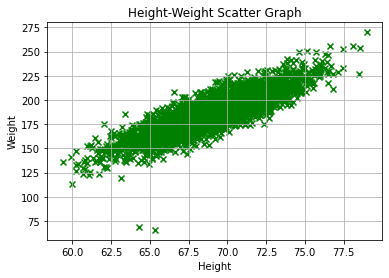

In [15]:
plt.scatter(df.Height,df.Weight, marker='x',color='green')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight Scatter Graph')
plt.grid()

In [16]:
x=df[['Height']]
y=df[['Weight']]

In [17]:
x.head(4)

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978


In [18]:
y.head(4)

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470


In [19]:
from sklearn.model_selection import train_test_split as tts

In [20]:
x_train,x_test,y_train,y_test= tts(x,y,test_size=.30)

In [21]:
x_train.head()

,Height
2944,67.894812
869,67.697104
3019,64.988090
772,69.145909
2655,66.658763


In [22]:
y_train.head()

,Weight
2944,178.327236
869,187.423896
3019,169.409645
772,202.628196
2655,183.171528


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lreg=LinearRegression()

In [25]:
lreg.fit(x_train,y_train)

LinearRegression()

In [26]:
m=lreg.coef_
m

array([[5.89657436]])

In [27]:
c=lreg.intercept_
c

array([-220.08984257])

In [28]:
x1=74.110105
y=m*x1+c
y

array([[216.90590256]])

In [29]:
lreg.predict([[x1]])

array([[216.90590256]])

In [30]:
pred=lreg.predict(x_test)
pred

array([[183.49860637],
       [175.01885027],
       [188.11278879],
       ...,
       [202.27988184],
       [191.2226319 ],
       [179.78400027]])

In [31]:
df['predected result']=lreg.predict(x)
df.head()

,Height,Weight,predected result
0,73.847017,241.893563,215.354585
1,68.781904,162.310473,185.487769
2,74.110105,212.740856,216.905905
3,71.730978,220.042470,202.877206
4,69.881796,206.349801,191.973363


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
mse=mean_squared_error(y_test,pred)

In [34]:
mse

107.15792563366979

In [35]:
mae=mean_absolute_error(y_test,pred)
mae

8.164457207917854

In [36]:
from sklearn.metrics import r2_score

In [37]:
r_score=r2_score(y_test,pred)
r_score

0.740984430586392

## Best Fit Line

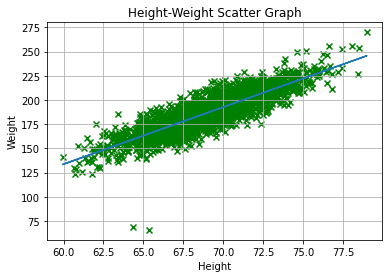

In [46]:
plt.scatter(x_train,y_train, marker='x',color='green')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight Scatter Graph')
plt.grid()
plt.plot(x_train,lreg.predict(x_train))

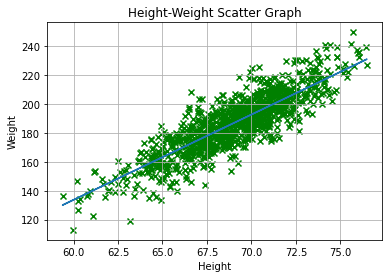

In [45]:
plt.scatter(x_test,y_test, marker='x',color='green')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight Scatter Graph')
plt.grid()
plt.plot(x_test,lreg.predict(x_test))

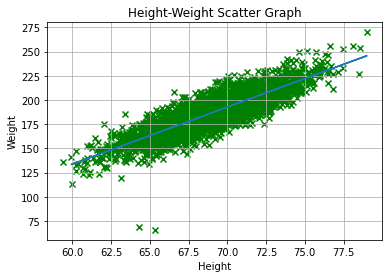

In [47]:
plt.scatter(df.Height,df.Weight, marker='x',color='green')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight Scatter Graph')
plt.grid()
plt.plot(x_train,lreg.predict(x_train))

In [48]:
lreg.score(x_test,y_test)

0.740984430586392